# Image Shadow Maker
In the following project we will add a shadow to a given image by using linear transformations (particularly shear transformation).

## Import necessary libraies

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Read Image
Read an image from a given directory and save it to a variable.

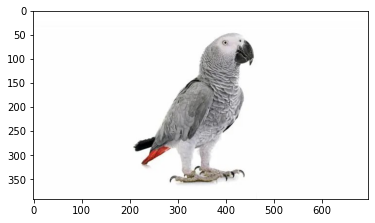

In [18]:
img = mpimg.imread("images/part2.jpg")
plt.imshow(img)

## Add a Gray Shadow
Add a gray shadow by coloring gray pixels which are next to 

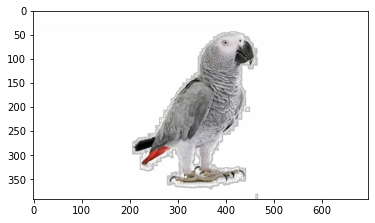

In [40]:
SHADOW_PIXEL_WIDTH = 3
SHADOW_RGB_COLOR = [189, 189, 189]
WHITE_COLOR_CUTOFF = 250

def is_pixel_white(pixel):
    return pixel.shape == (3,) and min(pixel[0], pixel[1], pixel[2]) > WHITE_COLOR_CUTOFF

def is_valid_pixel(row, col, img):
    return 0 <= min(row, col) and row < img.shape[0] and col < img.shape[1]

def is_near_image(row, col, img):
    for i in range(row - SHADOW_PIXEL_WIDTH, row + SHADOW_PIXEL_WIDTH):
        for j in range(col - SHADOW_PIXEL_WIDTH, col + SHADOW_PIXEL_WIDTH):
            if is_valid_pixel(i, j, img) and not is_pixel_white(img[i, j]):
                return True
    return False

def add_shadow(img):
    shadowed_img = img.copy()
    for i in range(shadowed_img.shape[0]):
        for j in range(shadowed_img.shape[1]):
            if is_pixel_white(img[i, j]) and is_near_image(i, j, img):
                shadowed_img[i, j] = SHADOW_RGB_COLOR
    return shadowed_img

shadowed_img = add_shadow(img)
plt.imshow(shadowed_img)

## Apply Shear Transformation
Apply shear transformation to the marginalized image by multiplying a matrix like `[[1, 0, 0], [ß, 1, 0], [0, 0, 1]]` to the computed image.

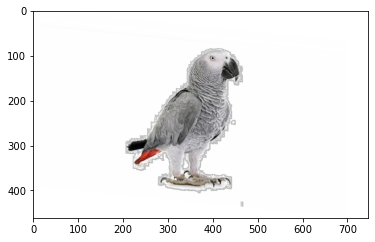

In [43]:
import matplotlib.transforms as mtransforms

SHEAR_COEFFICIENT = 0.1
transformation_matrix = mtransforms.Affine2D.from_values(1, SHEAR_COEFFICIENT, 0, 1, 0, 0)

def shear_image(ax, image):
    im = ax.imshow(image)
    
    trans_data = transformation_matrix + ax.transData
    im.set_transform(trans_data)

    ax.set_ylim(image.shape[0] + 70, 0)
    ax.set_xlim(0, image.shape[1] + 50)

    
fix, (img_ax) = plt.subplots(1, 1)
shear_image(img_ax, shadowed_img)
plt.show()